In [ ]:
pip install yfinance

In [4]:
from cvxpy_portfolio_optimizer.objective_function import (
    VarianceObjectiveFunction,
    CVaRObjectiveFunction,
)
from cvxpy_portfolio_optimizer.effiticent_frontier import EfficientFrontier
import cvxpy as cp
import yfinance as yf

In [5]:
tickers = ["TSLA", "MSFT", "IBM", "GOOG", "AAPL", "AMZN", "ADBE"]
rets = (
    yf.download(tickers, period="1y")["Adj Close"].loc[:, tickers].pct_change().iloc[1:, :].ffill()
)
rets

[*********************100%%**********************]  7 of 7 completed


Ticker,TSLA,MSFT,IBM,GOOG,AAPL,AMZN,ADBE
Date,,,,,,,
2023-05-23,-0.016413,-0.018432,0.005333,-0.020497,-0.015155,-0.000174,-0.004381
2023-05-24,-0.015449,-0.004473,-0.019504,-0.013383,0.001632,0.015306,-0.012580
2023-05-25,0.008584,0.038458,0.008593,0.022279,0.006692,-0.014989,0.071905
2023-05-26,0.047162,0.021386,0.016803,0.008685,0.014105,0.044435,0.059506
2023-05-30,0.041363,-0.005047,0.004577,-0.006298,0.010660,0.012905,0.004381
...,...,...,...,...,...,...,...
2024-05-14,0.032928,0.006865,-0.001194,0.006027,0.006173,0.002680,-0.014821
2024-05-15,-0.020051,0.017484,0.005378,0.011342,0.012218,-0.005773,0.019750
2024-05-16,0.004885,-0.004940,0.004220,0.008914,0.000632,-0.012689,-0.005089


We will compute the efficient frontier for a portfolio where we will:
- Minimize CVaR at 95% confidence level
- Compute 100 point in the efficient frontier

In [6]:
cvar_ef = EfficientFrontier(
    returns=rets,
    objective_function=CVaRObjectiveFunction(confidence_level=0.95),
)

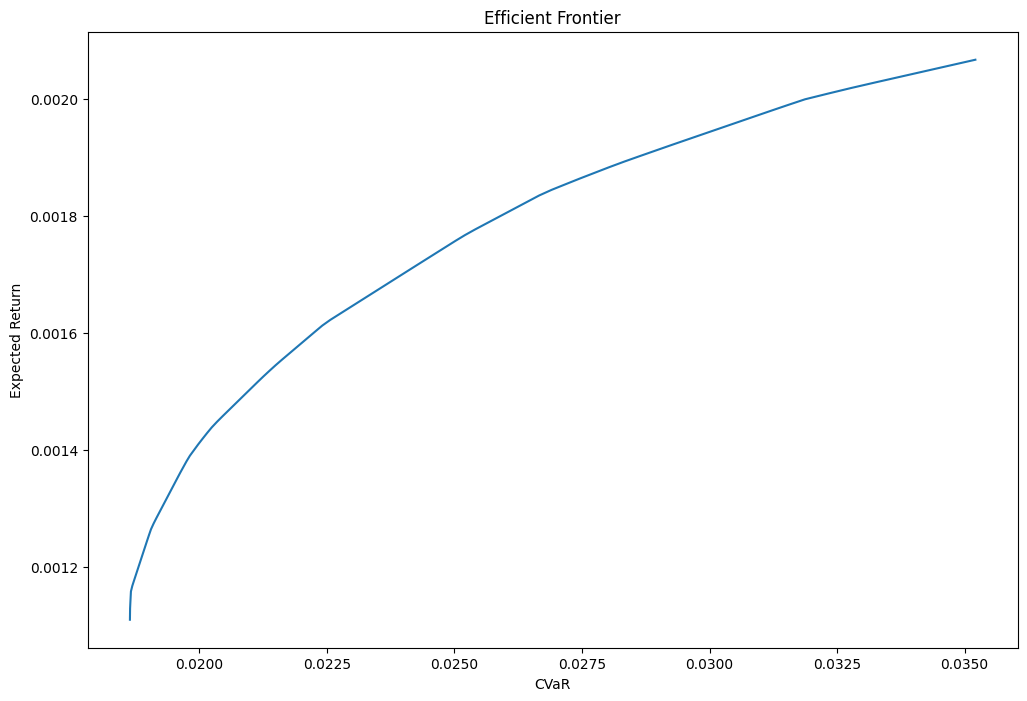

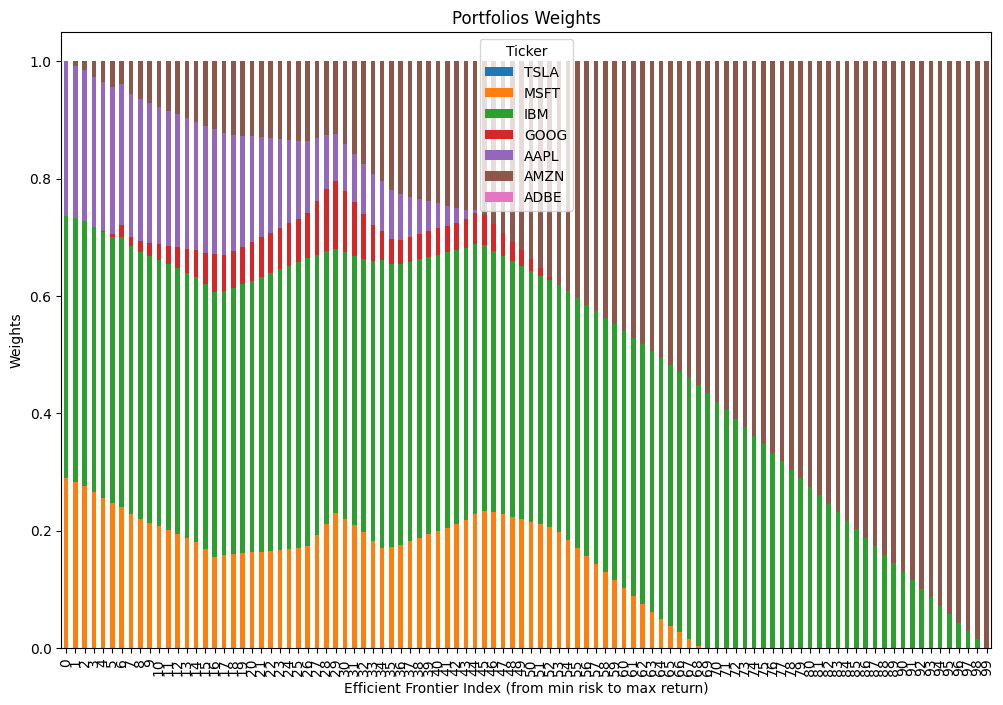

In [7]:
cvar_ef.plot_efficient_frontier(npoints=100, solver=cp.CLARABEL)

We will compute the efficient frontier for a portfolio where we will:
- Minimize Variance
- Compute 100 point in the efficient frontier

In [8]:
variance_ef = EfficientFrontier(
    returns=rets,
    objective_function=VarianceObjectiveFunction(),
)

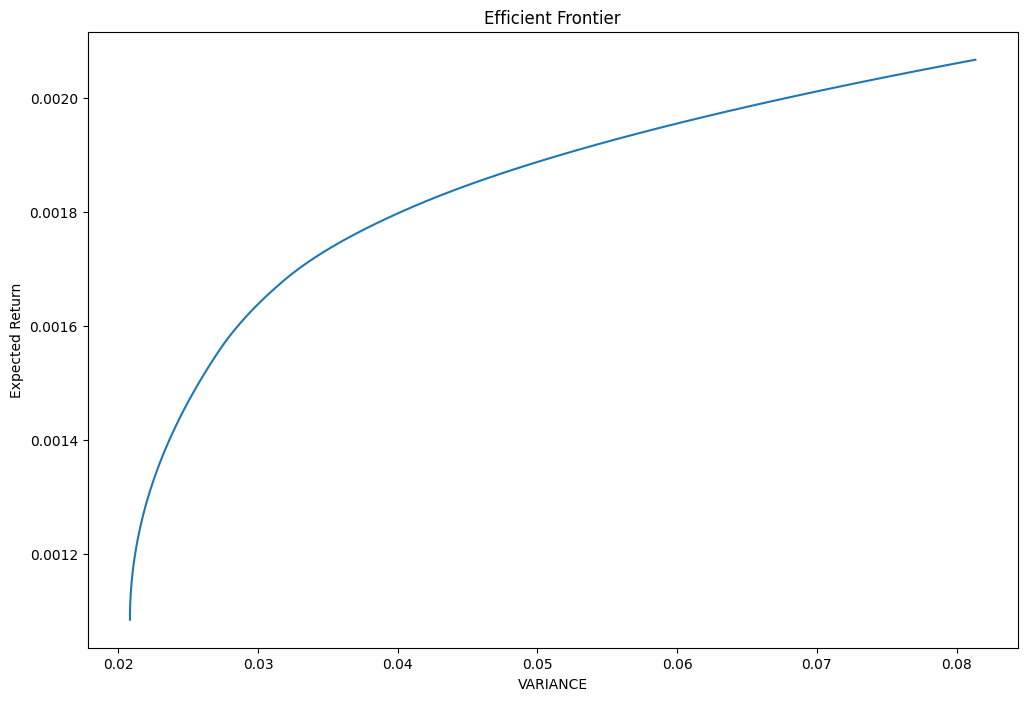

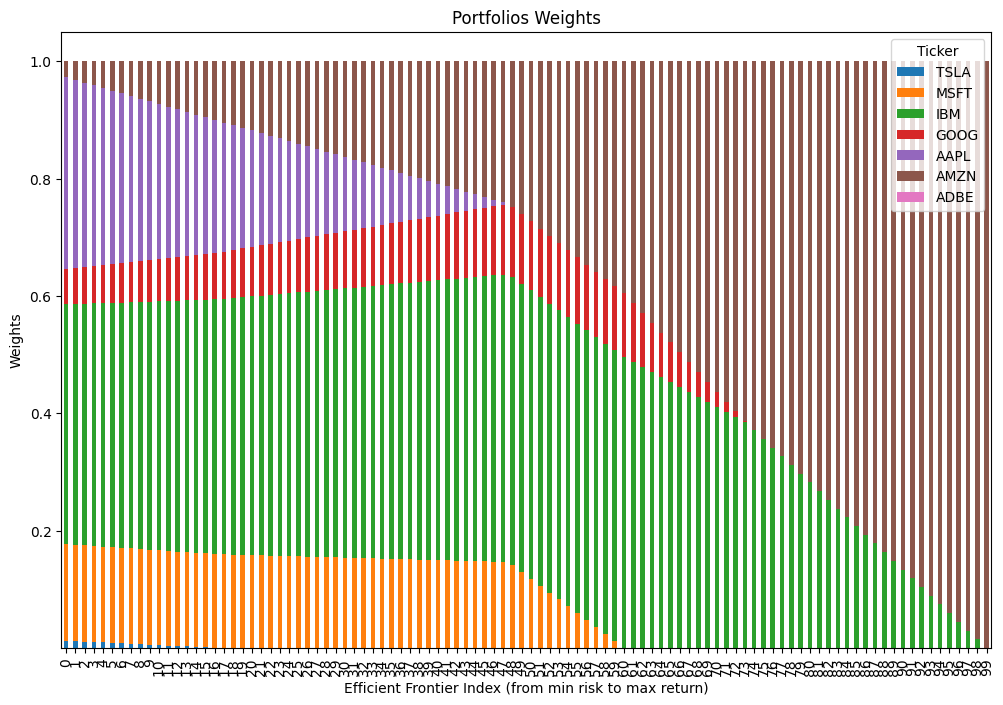

In [9]:
variance_ef.plot_efficient_frontier(npoints=100, solver=cp.CLARABEL)